<a href="https://colab.research.google.com/github/ACCMouli/chandu/blob/main/lllms/Topic1_LLMs_Prompt_Engineering%202/LLMs_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# LLMs Lab-1

# Accessing OpenAI LLM through an API

In [2]:
!pip install OpenAI
!pip install langchain
!pip install langchain_community
!pip install Cohere
!pip install langchain-openai langchain-cohere python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: httpx-sse
    Found existing installation: httpx-sse 0.4.1
    Uninstalling httpx-sse-0.4.1:
      Successfully uninstalled httpx-sse-0.4.1
   ━━━━━━━

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
from google.colab import userdata


In [38]:
openai_key = userdata.get("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = openai_key


In [39]:
#from langchain.llms import OpenAI, Cohere
from langchain_openai import OpenAI
llm= OpenAI()


In [40]:
print(llm.invoke("How many minimum sleeping hours you should have?"))



The National Sleep Foundation recommends that adults aged 18-64 should aim for 7-9 hours of sleep per night. However, individual sleep needs may vary and some people may function well with less or more sleep. It is important to listen to your body and make sure you are getting enough quality sleep to feel rested and alert during the day.


In [41]:
print(llm.invoke("What is the sentiment of this review. Give one word answer Pos or Neg - The staff was friendly and helpful. I had a great experience with my loan officer."))



Pos


### creating list and converting to dataframe

In [42]:
import pandas as pd

# Create a list of log messages
log_messages = [
    "Server started successfully",
    "Low disk space",
    "Database connection failed",
    "Security breach detected",
    "New feature released",
]

# Create a DataFrame with 10 rows and 1 column
df = pd.DataFrame(log_messages, columns=["Message"])

In [43]:
# Classify each log message using llm.invoke
df["Sentiment"] = df["Message"].apply(lambda message: llm.invoke(f"Classify the severity of this log message make give output as CRITICAL if the message is critical: {message}"))

In [44]:
df

,Message,Sentiment
0,Server started successfully,\n\nThe severity of this log message is not sp...
1,Low disk space,on the system\n\nNot critical
2,Database connection failed,\n\nCRITICAL
3,Security breach detected,\n\nCRITICAL
4,New feature released,\n\nNot critical


### reading from csv file and getting sentiments

In [45]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/giridhar276/Datasets/refs/heads/main/moviesentiments/movie_reviews.csv")

In [46]:
df

,review
0,The cinematography is moving and the direction...
1,"The acting is messy, while the sound design fe..."
2,"The score is wooden, while the visual effects ..."
3,The lighting is compelling and the story is ab...
4,The screenplay is tight and the direction is g...
5,"The pacing is tight, but the film balances hig..."
6,The cast is nuanced and the humor is charismat...
7,"The cast is awful, while the chemistry feels p..."
8,"The dialogue is boring, while the pacing feels..."
9,"The acting is wooden, but the film balances hi..."


In [47]:
# Classify each log message using llm.invoke
df["Sentiment"] = df["review"].apply(lambda message: llm.invoke(f"Classify the sentiment of this  message make give output as positive or negative only: {message}"))

In [48]:
df

,review,Sentiment
0,The cinematography is moving and the direction...,\n\nPositive
1,"The acting is messy, while the sound design fe...",\n\nNegative
2,"The score is wooden, while the visual effects ...",\n\nNegative
3,The lighting is compelling and the story is ab...,\n\nPositive
4,The screenplay is tight and the direction is g...,\n\nPositive
5,"The pacing is tight, but the film balances hig...",\n\nPositive
6,The cast is nuanced and the humor is charismat...,\n\nPositive
7,"The cast is awful, while the chemistry feels p...",\nNegative
8,"The dialogue is boring, while the pacing feels...",\n\nNegative
9,"The acting is wooden, but the film balances hi...",\nNegative


### specifying required model in openai

In [49]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


In [50]:

resp = llm.invoke("How many minimum sleeping hours should an adult have?")
print(resp.content)

Most adults should aim for 7 to 9 hours of sleep per night for optimal health and functioning. However, individual needs can vary, and some people may feel well-rested with slightly less, while others may require more. It's important to listen to your body and prioritize sleep quality as well as quantity.


### using cohere

In [5]:

cohere_key = userdata.get("COHERE_API_KEY")
os.environ["COHERE_API_KEY"] = cohere_key

In [6]:
#from langchain.llms import OpenAI, Cohere
from langchain_cohere import ChatCohere
llm= ChatCohere()


In [7]:
print(llm.invoke("How many minimum sleeping hours you should have?").content)

The minimum number of sleeping hours required varies by age and individual needs, but general guidelines from organizations like the **National Sleep Foundation** and the **Centers for Disease Control and Prevention (CDC)** suggest the following:

### **Recommended Sleep Hours by Age Group:**
- **Adults (18–64 years):** 7–9 hours per night.  
- **Teens (14–17 years):** 8–10 hours per night.  
- **Younger children and adolescents:**  
  - 6–13 years: 9–11 hours.  
  - 3–5 years: 10–13 hours.  
  - 1–2 years: 11–14 hours.  
  - Infants (0–12 months): 12–17 hours (varies by age).  

### **Minimum Sleep Requirements:**
While the above ranges are ideal, the **minimum** sleep needed to avoid significant health risks is generally considered:
- **Adults:** At least **7 hours** per night.  
- **Teens:** At least **8 hours** per night.  

### **Why Sleep Matters:**
- **Less than 7 hours** (for adults) or **8 hours** (for teens) consistently can lead to:  
  - Impaired cognitive function (memory,

In [8]:
print(llm.invoke("What is the sentiment of this review. Give one word answer Pos or Neg - The staff was friendly and helpful. I had a great experience with my loan officer.").content)

Pos


### creating list and converting to dataframe reading from it

In [9]:
import pandas as pd

# Create a list of log messages
log_messages = [
    "Server started successfully",
    "Low disk space",
    "Database connection failed",
    "Security breach detected",
    "New feature released",
]

# Create a DataFrame with 10 rows and 1 column
df = pd.DataFrame(log_messages, columns=["Message"])

In [10]:
df

,Message
0,Server started successfully
1,Low disk space
2,Database connection failed
3,Security breach detected
4,New feature released


In [11]:
# Classify each log message using llm.invoke
df["Sentiment"] = df["Message"].apply(lambda message: llm.invoke(f"Classify the sentiment of this  message make give output as positive or negative only: {message}").content)

In [12]:
df

,Message,Sentiment
0,Server started successfully,positive
1,Low disk space,negative
2,Database connection failed,negative
3,Security breach detected,negative
4,New feature released,Positive


### reading from csv file and getting sentiments

In [13]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/giridhar276/Datasets/refs/heads/main/moviesentiments/movie_reviews.csv")

In [14]:
df

,review
0,The cinematography is moving and the direction...
1,"The acting is messy, while the sound design fe..."
2,"The score is wooden, while the visual effects ..."
3,The lighting is compelling and the story is ab...
4,The screenplay is tight and the direction is g...
5,"The pacing is tight, but the film balances hig..."
6,The cast is nuanced and the humor is charismat...
7,"The cast is awful, while the chemistry feels p..."
8,"The dialogue is boring, while the pacing feels..."
9,"The acting is wooden, but the film balances hi..."


In [21]:
# Classify each log message using llm.invoke
df["Sentiment"] = df["review"].apply(lambda message: llm.invoke(f"Classify the sentiment of this  message make give output as positive or negative only: {message}").content)

TooManyRequestsError: headers: {'access-control-expose-headers': 'X-Debug-Trace-ID', 'cache-control': 'no-cache, no-store, no-transform, must-revalidate, private, max-age=0', 'content-type': 'application/json', 'expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'pragma': 'no-cache', 'vary': 'Origin', 'x-accel-expires': '0', 'x-debug-trace-id': '29218135cb1caae6a3afc6c141ff9da8', 'date': 'Sun, 14 Sep 2025 06:41:25 GMT', 'content-length': '372', 'x-envoy-upstream-service-time': '17', 'server': 'envoy', 'via': '1.1 google', 'alt-svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}, status_code: 429, body: {'id': 'e8700fce-fc49-4638-bf93-893e7e5fb2bb', 'message': "You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}

In [17]:
df

,review
0,The cinematography is moving and the direction...
1,"The acting is messy, while the sound design fe..."
2,"The score is wooden, while the visual effects ..."
3,The lighting is compelling and the story is ab...
4,The screenplay is tight and the direction is g...
5,"The pacing is tight, but the film balances hig..."
6,The cast is nuanced and the humor is charismat...
7,"The cast is awful, while the chemistry feels p..."
8,"The dialogue is boring, while the pacing feels..."
9,"The acting is wooden, but the film balances hi..."


In [ ]:
df.to_csv("finaloutput.csv")

### specifying model in coher

In [19]:
from langchain_cohere import ChatCohere
cllm = ChatCohere(model="command-r-plus", temperature=0.2)
print(cllm.invoke("Answer in one line: minimum adult sleep hours?").content)

The recommended minimum amount of sleep for an adult is 7 hours.


### batch with concurrency (LangChain)

In [20]:
from langchain_core.prompts import ChatPromptTemplate
import pandas as pd



In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/giridhar276/Datasets/refs/heads/main/moviesentiments/movie_reviews.csv")


In [23]:
# Keep the instruction out of the loop; send only the variable text per row
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a strict sentiment classifier. "
               "Return exactly 'positive' or 'negative' only."),
    ("human", "Text: {text}\nLabel:")
])
chain = prompt | llm


In [24]:

texts = df["review"].astype(str).tolist()
texts


["The cinematography is moving and the direction is stellar. Thanks to confident storytelling, the film never loses momentum. Easily one of the year's standouts.",
 'The acting is messy, while the sound design feels flat. Lethargic editing drains the energy from every scene. A forgettable slog.',
 'The score is wooden, while the visual effects feels incoherent. Tone‑deaf editing drains the energy from every scene. Save your time.',
 'The lighting is compelling and the story is absorbing. Thanks to precise storytelling, the film never loses momentum. A crowd‑pleaser with real substance.',
 'The screenplay is tight and the direction is gorgeous. Thanks to confident direction, the film never loses momentum. It stuck with me long after the credits.',
 'The pacing is tight, but the film balances highs and lows. A competent movie that fades fast after the credits.',
 'The cast is nuanced and the humor is charismatic. Thanks to assured storytelling, the film never loses momentum. I walked out

In [25]:

# Batch requests; tune max_concurrency based on your rate limits (e.g., 5–10)
outs = chain.batch([{"text": t} for t in texts], config={"max_concurrency": 8})


TooManyRequestsError: headers: {'access-control-expose-headers': 'X-Debug-Trace-ID', 'cache-control': 'no-cache, no-store, no-transform, must-revalidate, private, max-age=0', 'content-type': 'application/json', 'expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'pragma': 'no-cache', 'vary': 'Origin', 'x-accel-expires': '0', 'x-debug-trace-id': '067f7fefb3436be2ee224a7e9c8482b7', 'date': 'Sun, 14 Sep 2025 06:43:11 GMT', 'content-length': '372', 'x-envoy-upstream-service-time': '12', 'server': 'envoy', 'via': '1.1 google', 'alt-svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}, status_code: 429, body: {'id': 'fd74702c-01d3-433f-83b7-b2e6bd224758', 'message': "You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}

In [ ]:

labels = [o.content.strip().lower() for o in outs]
df["Sentiment"] = ["positive" if l.startswith("pos") else "negative" for l in labels]


In [ ]:
df

In [26]:
def classify(txt):
    resp = llm.invoke(
        "You are a strict sentiment classifier. "
        "Return exactly 'positive' or 'negative'.\n\n"
        f"Text: {txt}\nLabel:"
    )
    label = resp.content.strip().lower()
    return "positive" if label.startswith("pos") else "negative"

sentiments = []
for review in df["review"].astype(str).tolist():
    sentiments.append(classify(review))

df["Sentiment"] = sentiments

TooManyRequestsError: headers: {'access-control-expose-headers': 'X-Debug-Trace-ID', 'cache-control': 'no-cache, no-store, no-transform, must-revalidate, private, max-age=0', 'content-type': 'application/json', 'expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'pragma': 'no-cache', 'vary': 'Origin', 'x-accel-expires': '0', 'x-debug-trace-id': 'e58d80a787662d9f64876b7c36be94d3', 'date': 'Sun, 14 Sep 2025 06:45:23 GMT', 'content-length': '372', 'x-envoy-upstream-service-time': '10', 'server': 'envoy', 'via': '1.1 google', 'alt-svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}, status_code: 429, body: {'id': '8573670b-a2a5-4994-8045-a66e0d89a02a', 'message': "You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}

### same as above with progress bar

In [27]:
!pip install tqdm

In [28]:
from tqdm.auto import tqdm

def classify(txt):
    resp = llm.invoke(
        "You are a strict sentiment classifier. "
        "Output exactly 'positive' or 'negative' only.\n\n"
        f"Text: {txt}\nLabel:"
    )
    label = resp.content.strip().lower()
    return "positive" if label.startswith("pos") else "negative"

sentiments = []
df = df.iloc[0:3]
for review in tqdm(df["review"].astype(str).tolist()):
    sentiments.append(classify(review))

df["Sentiment"] = sentiments

  0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
df

,review,Sentiment
0,The cinematography is moving and the direction...,positive
1,"The acting is messy, while the sound design fe...",negative
2,"The score is wooden, while the visual effects ...",negative


# Gen AI - Code Generation in Google Colab

Import dataset from https://raw.githubusercontent.com/giridhar276/Datasets/master/Automobile%20Data%20Set/AutoDataset.csv

In [30]:
df=pd.read_csv("https://raw.githubusercontent.com/giridhar276/Datasets/master/Automobile%20Data%20Set/AutoDataset.csv")

print number of rows and columns

In [31]:
df.shape

(205, 26)

Print the column names

In [32]:
df.columns

Index([' symboling', ' normalized-losses', ' make', ' fuel-type',
       ' aspiration', ' num-of-doors', ' body-style', ' drive-wheels',
       ' engine-location', ' wheel-base', ' length', ' width', ' height',
       ' curb-weight', ' engine-type', ' num-of-cylinders', ' engine-size',
       ' fuel-system', ' bore', ' stroke', ' compression-ratio', ' horsepower',
       ' peak-rpm', ' city-mpg', ' highway-mpg', ' price'],
      dtype='object')

Create a bar chart for the 'fuel-type' column

In [36]:
sns.histplot(x='fuel-type', data=df)
plt.show()

ValueError: Could not interpret value `fuel-type` for `x`. An entry with this name does not appear in `data`.

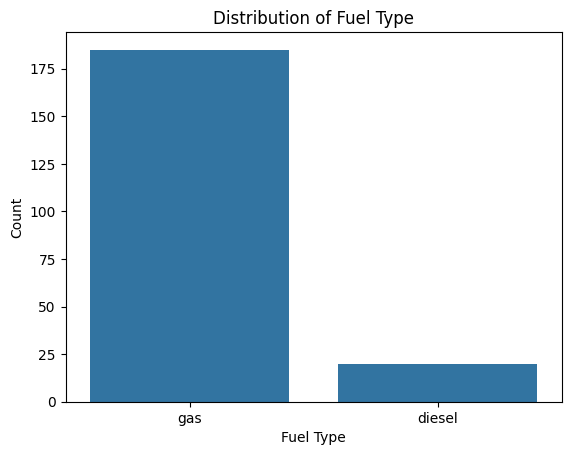

In [33]:
sns.countplot(x=' fuel-type', data=df)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Findout outliers in price column

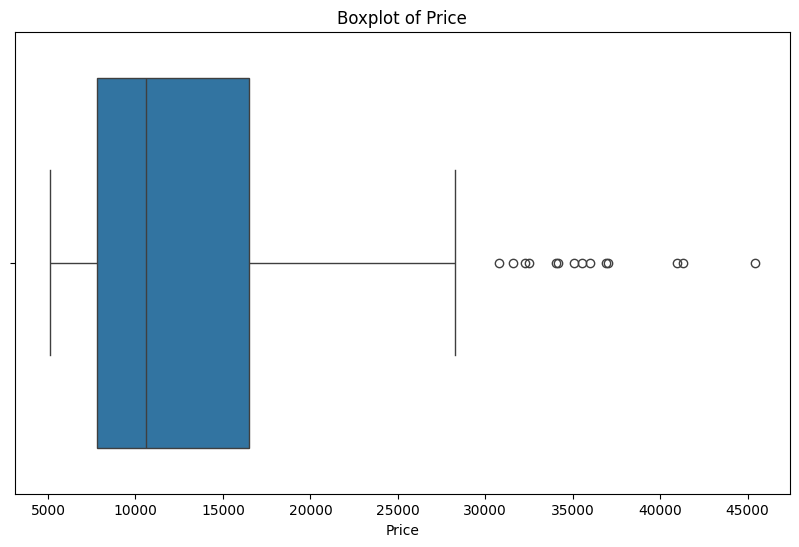

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[' price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()